# BABS 507 Project (Period 1 2020)
#### Instructor: Martha Essak

Replace all sections that are highlighted with your answers and remove the highlighting by deleting the code style. **Add markdown and code cells as needed to complete your project.** Please do not modify the headings of the sections.

Helpful notes abouts markdown in Jupyter to get you started:
* When you have a cell selected (by clicking on the white space to the left of the cell) in Command mode (blue box around the cell), press `a` or `b` to add a cell "above" or "below"
* In Command mode, press `d` twice to delete the cell. Press z to undo deleting a cell
* In Command mode, press `m` to change a code cell to a markdown cell, or press `y` to change a markdown cell to a code cell
* In Command mode, press `x` to cut cell, `c` to copy cell, and `v` to paste cell below the selected cell
  
* Double click a cell to enter Edit mode (green box around the cell), or press `Enter`
* Add two empty spaces at the end of a line to add a line break
* Press `shift + enter` to execute a cell to see either the formatted version (for a markdown cell) or to run the code (for a code cell). This will cause you to leave edit mode.
* Press `Ctrl + Shift + -` to split the current cell into two cells where the cursor is
* Press `Shift + m` to merge multiple cells. You can use `Shift + up arrow` or `Shift + down` arrow to select multiple cells.



[See cheat sheet for Markdown in Jupyter for more details](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)

### Names of students:
<code style="color:black">Shijie Yu (39740535)  
Abhijit Agrawal (86948742) 
</code> 

---

## Table of Contents
[Project description](#Description)  
[Introduction](#Introduction)  
[Exploratory Data Analysis](#EDA)  
[Model fit to training data, checking assumptions](#Model_fit)  
[Hypothesis tests](#Hyp_tests)  
[Using the model for prediction](#Prediction)  
[Comparing to other candidate models](#Compare) 
[Discussion](#Discussion)


[Visualizing appropriate transformations](#Transformations)  
[Other candidate models](#Other_models)

---

<a id="Description"></a>
## Project description

You will develop a multiple linear regression model to predict sale price of houses (\\$ CAD) in Vancouver using the following potential candidate quantitative variables:  
- Days on market (days)
- Total floor area (square feet)
- Age (years); this is calculated from Year Built so you do not need to use Year Built
- Lot Size (square feet)

The data was collected from detached homes with sale prices of at most \\$3 million in 2019 and early 2020, prior to any impacts of the pandemic on the real estate market in Vancouver.  Note that because we are excluding all houses with prices over \\$3 million, the data may appear truncated.  

Assume that we are trying to predict sale price for the same time period that the data was collected. Consider how predicting sale price could be valuable for realtors representing both house sellers and house buyers.  

### Methods  
  
First, you will divide the dataset into a training set and a validation set. You will use the training set to develop your model. You can transform variables as appropriate. Note that if you transform age using a power transformation or a log transformation, you should add 1 year to all the values of age first.   
  
You will conduct exploratory data analysis, visualizing the relationships between the variables. You should include code for visualizing appropriate transformations at the end of the project.  

In the main part of the project, you will present the results of your best model (referred to as the final model), which you will choose by considering the following:
- checking assumptions are met
- assessing goodness of fit to the training set
- considering the variables and complexity of the model
- assessing how well the model predicts new data (using the validation set as new data)

Before creating any models, you should consider is the objective and which variables you would have access to when attempting to use the model to create predictions.

At the end of the project, you should include code for any other candidate models that you considered. 
  
You will discuss the strengths and limitations of your final model, and provide any recommendations to address the limitations.

---

### Make sure that your code is organized. Includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (1 mark)
---

<a id="Introduction"></a>
# Introduction (300 words max.) (2.5 marks) - Part A
---

The objective of the project is to predict house prices based on detached homes with sale prices of at 
most $3 million in 2019 and early 2020. We are restricting the data to pre-COVID to avoid any influence of 
the pandemic to the sales price of houses. Through multiple linear regression models, we will analyze the 
effects of explanatory variables (days on market, total floor area, age, and lot size) on the response 
variable (price). 

“Housing activity is returning to pre-pandemic levels in Vancouver, and the housing market is continuing
to stabilize after two pandemic years.” As the effects of the pandemic neutralize, the model will not only help
sellers in setting the appropriate price for their houses to ensure they get the best price possible but will 
also help buyers check if they are receiving a fair deal on their purchase. Moreover, the correlation between 
price and days on market will help the seller realize how long they can expect their house to stay on the market
and enable them to better understand what the price needs to be for a quick sale.

We are performing a multiple linear regression for this project as we know the value of the response variables 
and we cannot always control the value of the explanatory variable. The model will help us understand the 
relationship between the two variables and since there are multiple explanatory variables involved, finding out 
the relationship would be too complex to solve any other way. The data set has been divided into two parts: 
train and test. This will enable us to train the model on the train set and then compare the predictions of 
the model with the real values of the test set to determine accuracy.


In [1]:
# import packages for analysis
library(Hmisc)
library(car)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: carData



In [2]:
# Import the data:
mydata <- read.csv("House sale data Vancouver.csv", header=TRUE)

In [3]:
# print the first 5 rows of data
head(mydata)

,Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,3178 GRAVELEY STREET,5/8/2020,1500000,18,2447,1946,74,5674.00
2,2,1438 E 28TH AVENUE,1/22/2020,1300000,7,2146,1982,38,3631.98
3,3,2831 W 49TH AVENUE,6/18/2019,2650000,1,3108,1929,90,9111.00
4,4,2645 TRIUMPH STREET,6/18/2019,1385000,28,2602,1922,97,4022.70
5,5,741-743 E 10TH AVENUE,11/28/2019,1590000,17,1843,1970,49,4026.00
6,6,86 W 21ST AVENUE,3/3/2020,2565000,7,2439,1989,31,4026.00


---
*The dataset includes the following variables:*
- Number: if your observations get out of order, please sort by Number to get them back in the correct order so that everyone will work with the same training set and validation set.
- Address: Address of the house.
- List.Date: The date that the house was listed for sale.
- Price: The final sale price of the house (\\$ CAD). Note that this may differ from what the original asking price was.
- Days.on.market: how many days the house was on the market before it sold.
- Total.floor.area: the total area in square feet of the finished living space, including kitchen, bathrooms, living room, bedrooms, etc. on all floors of the house
- Year.Built: the year when the house was built.
- Age: calculated from Year.Built to represent the house age around the time of sale.
- Lot.size: the size of the lot in square feet. This includes the area of the footprint of the house, and the area of any yard or garden.
---

In [4]:
# Create a training set and a validation set using the following code
# This will divide the dataset into ~80% training set (1042 observations)
# and ~ 20% validation set (260 observations)

# DO NOT MODIFY THIS CODE!

mydata.train <- mydata[1:1042,]
mydata.valid <- mydata[1043:nrow(mydata),]

---
<a id="EDA"></a>
# Exploratory data analysis (4 marks) - Part A

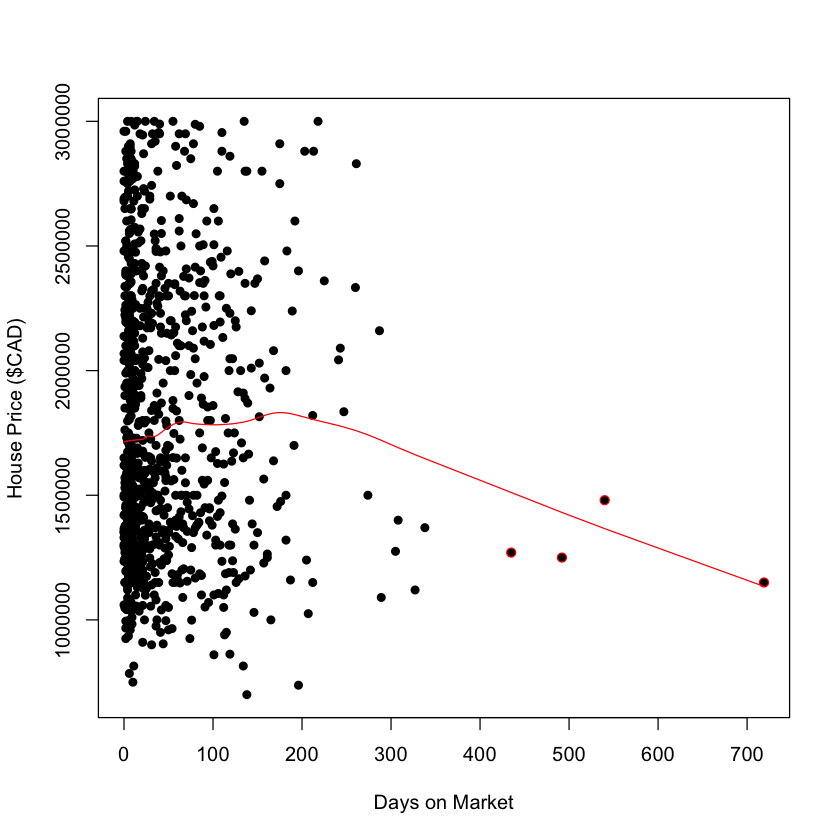

In [5]:
# Sales price of house vs Days on Markets

# code for making the plot:
outliers1 <- subset(mydata.train, mydata.train$Days.on.market > 400)
plot(mydata.train$Days.on.market, mydata.train$Price, ylab = "House Price ($CAD)", xlab = "Days on Market", pch = 16)
points(outliers1$Days.on.market, outliers1$Price, col = "red")
x1 <- mydata.train$Days.on.market[order(mydata.train$Days.on.market)] #put the x-values in order
y1 <- mydata.train$Price[order(mydata.train$Days.on.market)] # put the y-values in order based on the order of the x-values
lines(lowess(x1, y1, delta=0.1), col="red")

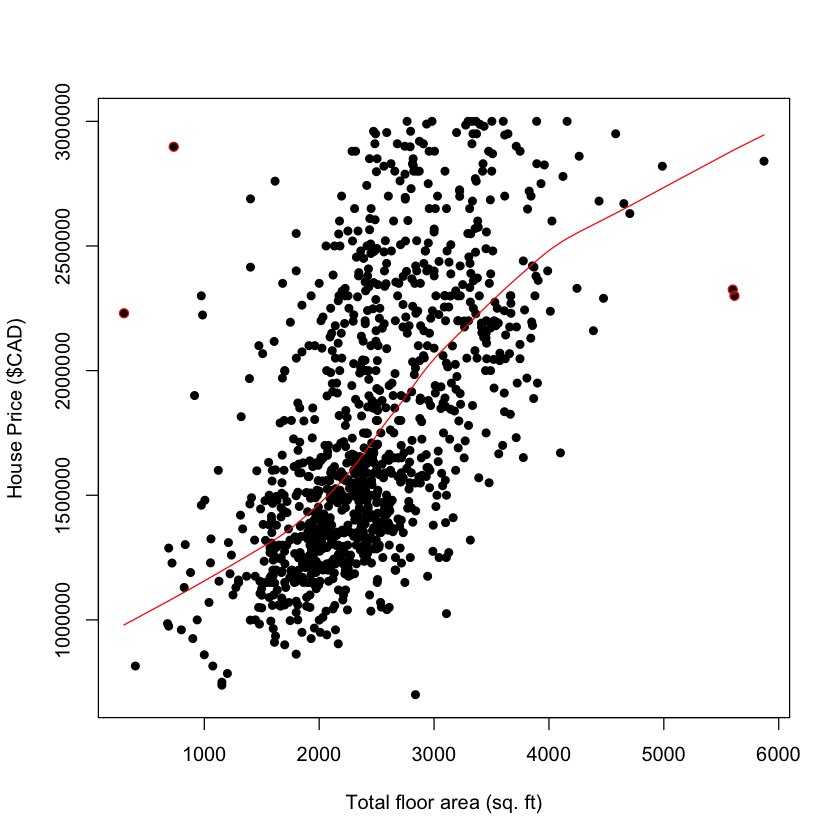

In [6]:
# Sales price of house vs Total floor area

# code for making the plot:
outliers2 <- rbind(subset(mydata.train, mydata.train$Total.floor.area > 5000 & mydata.train$Price < 2500000), 
                  subset(mydata.train, mydata.train$Total.floor.area < 900 & mydata.train$Price > 2000000))
plot(mydata.train$Total.floor.area, mydata.train$Price, ylab = "House Price ($CAD)", xlab = "Total floor area (sq. ft)", pch = 16)
points(outliers2$Total.floor.area, outliers2$Price, col = "red")
x1 <- mydata.train$Total.floor.area[order(mydata.train$Total.floor.area)] #put the x-values in order
y1 <- mydata.train$Price[order(mydata.train$Total.floor.area)] # put the y-values in order based on the order of the x-values
lines(lowess(x1, y1, delta=0.1), col="red")

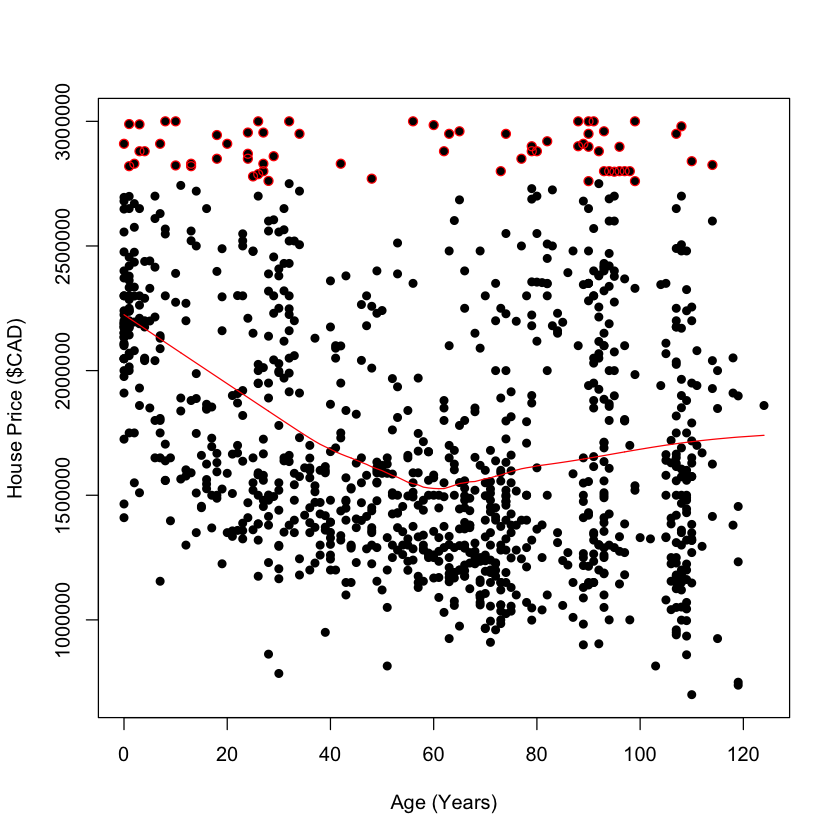

In [7]:
# Sales price of house vs Age

# code for making the plot:
outliers3 <- subset(mydata.train, mydata.train$Price > 2750000)
plot(mydata.train$Age, mydata.train$Price, ylab = "House Price ($CAD)", xlab = "Age (Years)", pch = 16)
points(outliers3$Age, outliers3$Price, col = "red")
x1 <- mydata.train$Age[order(mydata.train$Age)] #put the x-values in order
y1 <- mydata.train$Price[order(mydata.train$Age)] # put the y-values in order based on the order of the x-values
lines(lowess(x1, y1, delta=0.1), col="red")

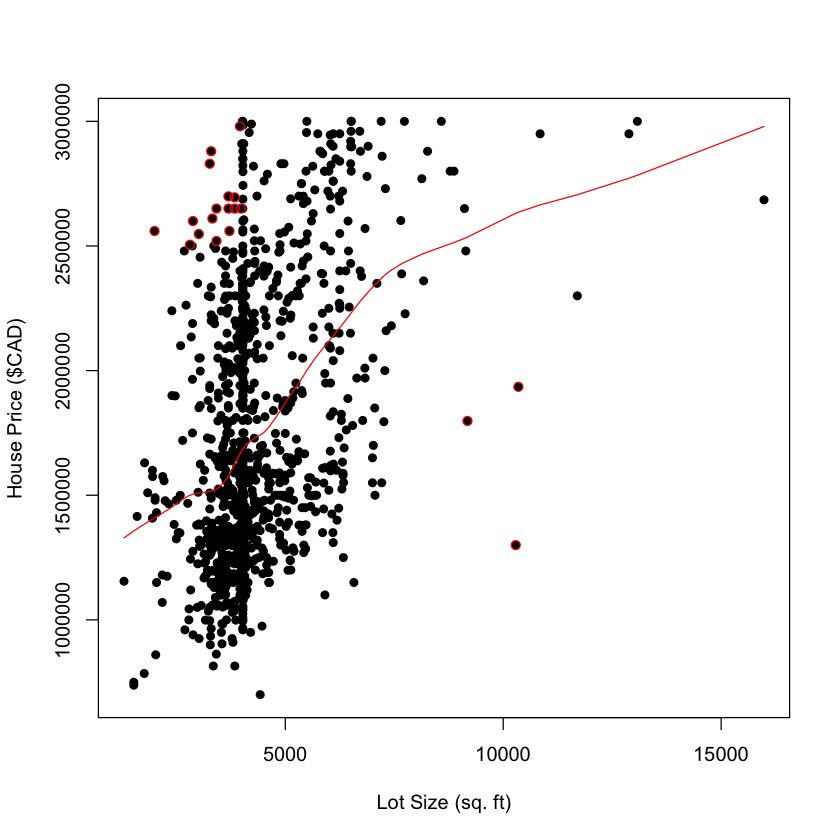

In [8]:
# Sales price of house vs Lot size

# code for making the plot:
outliers4 <- rbind(subset(mydata.train, mydata.train$Lot.Size > 9000 & mydata.train$Price < 2000000), 
                  subset(mydata.train, mydata.train$Lot.Size < 4000 & mydata.train$Price > 2500000))
plot(mydata.train$Lot.Size, mydata.train$Price, ylab = "House Price ($CAD)", xlab = "Lot Size (sq. ft)", pch = 16)
points(outliers4$Lot.Size, outliers4$Price, col = "red")
x1 <- mydata.train$Lot.Size[order(mydata.train$Lot.Size)] #put the x-values in order
y1 <- mydata.train$Price[order(mydata.train$Lot.Size)] # put the y-values in order based on the order of the x-values
lines(lowess(x1, y1, delta=0.1), col="red")

| Explanatory Variable | Form | Direction | Strength | Outliers|
| :----:| :----:| :----: |:----: | :----:|
| $Days.on.market$ | Non-linear | / | / | few |
| $Total.floor.area$ | Linear | Positive | Moderately Strong | few |
| $Age$ | Non-linear | / | / | a lot |
| $Lot.Size$ | Linear| Positive | Moderately Weak | few |

- The outliers of `Days.on.market` are points with large Days on Market. These points (in red color) are away from gathering points. Prices of houses indicated by these points are also relatively low, probably because these houses have some drawbacks that kept them on the market for a long time.
- The outliers of `Total.floor.area` are points with high price but small floor areas together with low price but larger floor areas. These points (in red color) could be explained as some expensive houses are at city center. And some cheap houses are situated at remote areas.
- The outliers of `Age` are points with high prices. These points (in red color) , especially with long age, could be explained as they are well maintained or with large floor area.
- The outliers of `Lot.Size` are points with high price but small lot size together with low price but larger lot size. These points (in red color) could be explained as some expensive houses are at city center with less place or new houses are designed with few lot size. And some cheap houses are situated at remote areas with more place.

---
<a id="Model_fit"></a>
# Model fit to training data, checking assumptions


In [9]:
# Add propriate transformation
# As we have chosen to move forward with the interaction model, there are no relevant transformations for our final model

### Fit your final model (1 mark for this model being appropriate for the data)

In [10]:
# Fit your final model here, use summary to get model co-efficients and other useful output:
# choosing an interaction model for final analysis
final_model <- lm(Price ~ Total.floor.area + Age + Lot.Size + Total.floor.area * Age 
                  + Lot.Size * Age + Total.floor.area * Lot.Size, data = mydata.train)
# printing summary of our model
summary(final_model)


Call:
lm(formula = Price ~ Total.floor.area + Age + Lot.Size + Total.floor.area * 
    Age + Lot.Size * Age + Total.floor.area * Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1193779  -310640  -105292   294137  1336346 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                4.988e+05  1.968e+05   2.535  0.01140 *  
Total.floor.area           5.873e+02  6.670e+01   8.805  < 2e-16 ***
Age                       -5.256e+03  1.694e+03  -3.103  0.00197 ** 
Lot.Size                   2.492e+01  4.857e+01   0.513  0.60804    
Total.floor.area:Age      -1.454e+00  6.106e-01  -2.381  0.01747 *  
Age:Lot.Size               1.979e+00  4.340e-01   4.561 5.69e-06 ***
Total.floor.area:Lot.Size -2.497e-02  1.176e-02  -2.123  0.03398 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 419000 on 1035 degrees of freedom
Multiple R-squared:  0.3979,	Adjusted R-s

**Write the equation of your model, replacing the co-efficients with the numbers from the output of the summary command: (0.5 marks)**  
<code style="color:black">Predicted value for house sale price ($CAD) = 49880 + 587.3 * Total Floor Area (sq. ft) - 525.3 * Age (years) + 2.492 * Lot size (sq.ft) - 1.454 * Total floor area * Age + 1.979 * Lot Size * Age - 0.02497 * Total floor area * Lot.Size
</code> 




**Interpret the value of each co-efficient assuming that the x-variables are independent of each other (you do not need to interpret the intercept) If you have an interaction, describe the type of interaction (reinforcement, interference): (1 mark)**    

- The coeffcient of `Total.floor.area` is 587.3, indicating that when the `Total.floor.area` increases by 1 square feet, the `Price` of the house increases by 587.3 CAD dollars.

- The coefficient of `Age` is -525.3, indicating that when the `Age` increases by 1 year, the `Price` of the house decresaes by 525.3 CAD dollars.

- The coefficient of `Lot.Size` is 2.492, indictaing that when the `Lot.Size` increases by 1 square feet, the `Price` of the house incresaes by 2.492 CAD dollars.

- The interaction of `Total.floor.area` and `Age` is an interaction one with the coefficient of -1.454, indicating that when the multiplication of `Total.floor.area` and `Age` increases by 1 unit, the `Price` of the house decreases by 1.454 CAD dollars.

- The interaction of `Lot.Size` and `Age` is a reinforcement one with the coefficient of 1.979, indicating that when the multiplication of `Lot.Size` and `Age` increases by 1 unit, the `Price` of the house increases by 1.979 CAD dollars.

- The interaction of `Lot.Size` and `Total.floor.area` is an interaction one with the coeffcient of -0.02497, indicating that when the multilpication of `Total.floor.area` and `Lot.Size` increases by 1 unit, the `Price` of the house decreases by 0.02497 CAD dollars.
 



---
## Check the assumptions (3 marks)
Create plots / conduct tests and write a sentence to interpret each result.

In [11]:
# Check assumptions of linearity, equal variance, normality here.
# Comment on any unusual observations (outliers) that are observed.
checkresiduals <- function(z.linear) {
  predict.values <- predict(z.linear)
  resid.values <- resid(z.linear)
  
  
  if (max(resid.values) > 3*summary(z.linear)$sigma) {
    ymax <-  max(resid.values)
  } else {
    ymax <-  3*summary(z.linear)$sigma 
  }
  
  if (min(resid.values) < -3*summary(z.linear)$sigma) { # Sigma here is the standard residual errors
    ymin <-  min(resid.values)
  } else {
    ymin <-  -3*summary(z.linear)$sigma 
  }
  
  
  par(mfrow=c(2,2))
  plot(resid.values ~ predict.values, ylim=c(ymin, ymax), main = "Residual plot")
  abline(0,0, lty=2)
  se <- summary(z.linear)$sigma
  abline(2*se, 0, col="red", lty=2)
  abline(-2*se, 0, col="red", lty=2)
  
  
  plot(resid.values, main = "Resid vs. obs #")
  abline(0,0, lty=2)
  lines(resid.values)
  
    
  hist(resid.values, prob = TRUE)
  curve(dnorm(x, mean = mean(resid.values), sd = sd(resid.values)), col = 'red', add = TRUE)
  
    
  qqnorm(resid.values, ylab= "standardized residuals", xlab = "Normal scores")
  qqline(resid.values, col= "red")
  
  shapiro.test(resid.values)
}


	Shapiro-Wilk normality test

data:  resid.values
W = 0.95584, p-value < 2.2e-16


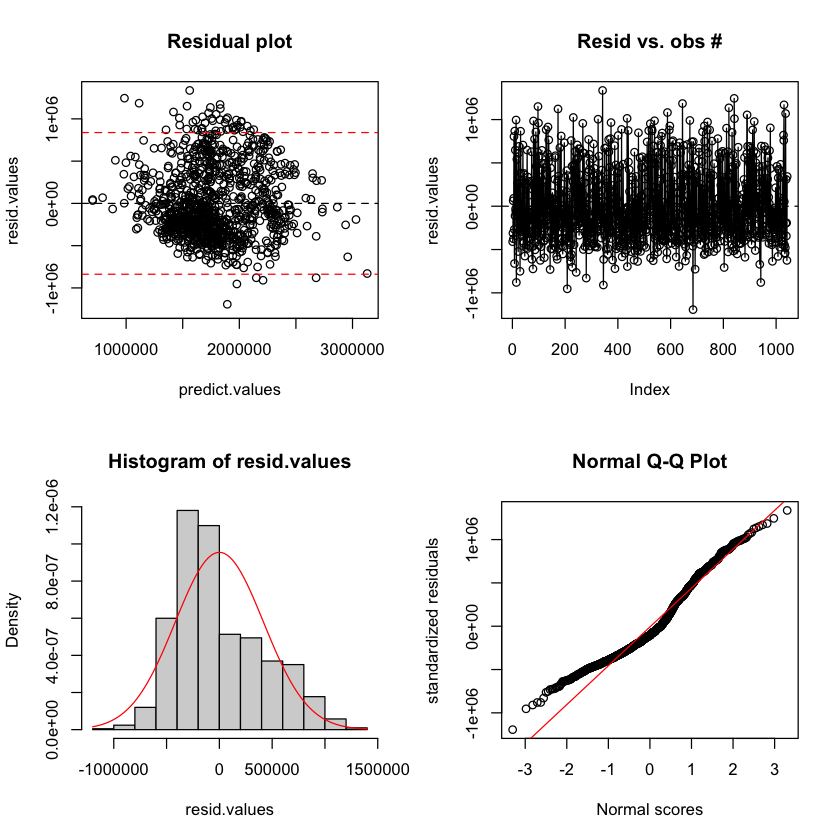

In [12]:
# plotting residual graphs matrix
checkresiduals(final_model)

- The residuals are scattered somewhat eqaully around the value of zero which is the mean in the Residual plot (resid.values vs predict.values of house price since there are more than 1 explanatory variables). This shows us that the models fits the linearity assumption. There are, however, some outliers that might affect the linearity but overall the model follows the linearity assumtion.

- The residual plot (resid.values vs predict.values of house price since there are more than 1 explanatory variables) shows that the model meets the assumption of equal variance as the band of points have a constant range from left to right. Although there are some points out of the range of the double standard residual erros, they are acceptable for most of observations are in the range as most observations.

- The Histogram of Residual Values and Normal Q-Q Plot indicates the normality of the model. But the p-value of Shapiro test is smaller than 0.05, which rejects the null hypothesis and tells use the assumption of normality is violated. However, we will assume that the assumption is met by visually looking at the graphs since the Shapiro test does not work very well with a big dataset so we can ignore that test for now.

**Describe how the assumption of independence could be violated for this dataset in relation to space. (200 words max.) (2 marks)**  
Violations to the assumption of independence in relation to space could occur if the observations from the same location (in this case Vancouver neighborhoods) are more similar to each other but are different from observations collected from a different location (different Vancouver neighborhood). 
The observations in our dataset are located close to each other in the same city so they all experience the same effects and if the price of one house goes up, the price of houses in the entire neighborhood will also likely go up which means that one observation could affect the other. This also means that the houses in that one neighborhood will be similar to each other but very different from another neighborhood. The location of the house determines the ultimate price of the house so houses in downtown Vancouver might be more expensive than the houses in the outskirts of Vancouver, even if they are of the same age, sq ft, and have been on the market for the same time. Hence, it is difficult not to have intra-class correlations in the dataset.
If we would like to check whether the dataset violates the independence assumption, we could check the intra-class correlations of observations.

---
## Goodness of fit to the training set. (0.5 marks)
Find the R2 value and the residual standard error. If you transformed the y-variable, get predicted values back in the original units, then calculate these yourself.

In [13]:
# predicting values based on our model
final_prediction <- predict(final_model)
# adding predictions to our training dataset
mydata.train$final_prediction <- final_prediction

# calculate SSY, SSE, and SSreg for analysis of our model fit
SSY_final <- sum((mydata.train$Price - mean(mydata.train$Price))^2)
SSE_final <- sum((mydata.train$Price - mydata.train$final_prediction)^2)
SSreg_final <- sum((mydata.train$final_prediction - mean(mydata.train$Price))^2)

# R^2 and residual standard error calculation
r.square_final <- 1-SSE_final/SSY_final
residual.se_final <- sqrt(SSE_final / (nrow(mydata.train) - 7))

sprintf("The r.square_final is %f",r.square_final)
sprintf("The residual standard error is %f", residual.se_final)


[1] "The r.square_final is 0.397941"

[1] "The residual standard error is 418994.456341"

---
## Do you have any concerns about the explanatory variables being related to each other? (1 mark)

Show plots and/or do analyses to support your conclusions. If there are associations between explanatory variables, what effect could this have on your model? How would this affect your predictions?  

In [14]:
# getting the correlation matrix to check the relationship between our variables
mydata.train.2 <- mydata.train[c(4, 5, 6, 8, 9)] 
cor.matrix <- cor(mydata.train.2, method="pearson")
round(cor.matrix, 4)

,Price,Days.on.market,Total.floor.area,Age,Lot.Size
Price,1.0000,0.0035,0.5851,-0.2366,0.4042
Days.on.market,0.0035,1.0000,0.0650,-0.0416,0.0743
Total.floor.area,0.5851,0.0650,1.0000,-0.3167,0.4101
Age,-0.2366,-0.0416,-0.3167,1.0000,-0.0142
Lot.Size,0.4042,0.0743,0.4101,-0.0142,1.0000


In [15]:
# conducting vif analysis for further understanding of the relationship between explanatory variables
final_model_relation <- lm(Price ~ Total.floor.area + Age + Lot.Size, data = mydata.train)
vif(final_model_relation)

Total.floor.area              Age         Lot.Size 
        1.360362         1.131748         1.224138

We have concerns about the `Total.floor.area` and `Lot.Size` being related to each other. When thinking about a real house, the larger `Total.floor.area` is, the greater the `Lot.Size` is. However, after checking the correlation matrix and conducting the `vif()` test, we found that the corrletion of `Total.floor.area` and `Lot.Size` is not very high (around 0.4) and the results of `vif()` test is quite low. Hence, we assume that for this data they are not related to each other.

---
<a id="Hyp_tests"></a>
## Hypothesis tests (1.5 marks)

Conduct an F-test for the significance of the regression and t-tests for the significance of each variable. If you have an interaction in your model, show only the test for the interaction (do not test the main effects).  
Write the concluding sentence for each hypothesis test, then in brackets include the test statistic and a p-value). Use alpha = 0.05 to make all decisions for this project.  
E.g.: The variable log baha is significant in the final model (t statistic = 15.32, df error = 38, p-value < 0.0001).

What do these results tell you about the contribution of each variable to your final model?

In [16]:
# F-test
drop1(final_model, test = 'F')

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,1.817008e+14,26985.63,NA,NA
Total.floor.area:Age,1,9.948562e+11,1.826957e+14,26989.32,5.666876,1.746841e-02
Age:Lot.Size,1,3.652736e+12,1.853536e+14,27004.37,20.806628,5.688307e-06
Total.floor.area:Lot.Size,1,7.913695e+11,1.824922e+14,26988.16,4.507780,3.397780e-02


- The interaction `Total.floor.area` * `Age` is significant in the final model (F value = 5.667, p-value < 0.05)
- The interaction `Lot.Size` * `Age` is significant in the final model (F value = 20.807, p-value < 0.05)
- The interaction `Total.floor.area` * `Lot.Size` is significant in the final model (F value = 4.508, p-value < 0.05)

In [17]:
summary(final_model)


Call:
lm(formula = Price ~ Total.floor.area + Age + Lot.Size + Total.floor.area * 
    Age + Lot.Size * Age + Total.floor.area * Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1193779  -310640  -105292   294137  1336346 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                4.988e+05  1.968e+05   2.535  0.01140 *  
Total.floor.area           5.873e+02  6.670e+01   8.805  < 2e-16 ***
Age                       -5.256e+03  1.694e+03  -3.103  0.00197 ** 
Lot.Size                   2.492e+01  4.857e+01   0.513  0.60804    
Total.floor.area:Age      -1.454e+00  6.106e-01  -2.381  0.01747 *  
Age:Lot.Size               1.979e+00  4.340e-01   4.561 5.69e-06 ***
Total.floor.area:Lot.Size -2.497e-02  1.176e-02  -2.123  0.03398 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 419000 on 1035 degrees of freedom
Multiple R-squared:  0.3979,	Adjusted R-s

- The interaction `Total.floor.area` * `Age` is significant in the final model (T value = -2.381, df error = 1035, p-value < 0.05)
- The interaction `Lot.Size` * `Age` is significant in the final model (T value = 4.561, df error = 1035, p-value < 0.05)
- The interaction `Total.floor.area` * `Lot.Size` is significant in the final model (T value = -2.123, df error = 1035, p-value < 0.05)

In [18]:
# t score
qt(0.975, nrow(mydata.train) - 7)

[1] 1.962259

In [19]:
# f score
qf(0.95, 6, nrow(mydata.train) - 7)

[1] 2.107325

---
<a id="Prediction"></a>
## Using the model for prediction (1 mark)

Generate predicted values using the **validation set data** as input in the final model. Make sure that you are still using the model that was fit to the training set data, and only using the test set data as new x-values.

Calculate the mean absolute error (MAE) and root mean squared error (root MSE) for the validation set.
If you transformed the y-variable, get predicted values back in the original units prior to calculating these.

In [20]:
# Include your code here
# predicting values by using our model on the validation dataset
prediction_final.valid <- predict(final_model, newdata = mydata.valid)
mydata.valid$prediction_final.valid <- prediction_final.valid
head(mydata.valid)

,Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size,prediction_final.valid
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1043,1043,3432 E 23RD AVENUE,6/11/2019,1314000,43,2650,1966,53,3960,1824461
1044,1044,3379 W 23RD AVENUE,9/11/2019,2175000,14,1636,1928,91,4026,1425977
1045,1045,5597 INVERNESS STREET,3/4/2019,1950000,145,2964,2012,7,4125,2027180
1046,1046,3427 MONS DRIVE,11/6/2019,1210000,1,1446,1948,71,4510,1409001
1047,1047,3492 E 49TH AVENUE,3/12/2020,1360000,47,2782,1972,48,4845,1930734
1048,1048,6282 WINDSOR STREET,12/10/2019,1380000,8,1876,1953,66,4026,1511380


In [21]:
# calculating mean absolute error and root mean squared error
mydata.valid$errors_final <- mydata.valid$Price - mydata.valid$prediction_final.valid
RMSE_final <- sqrt(sum(mydata.valid$errors_final^2)/nrow(mydata.valid))
MAE_final <- sum(abs(mydata.valid$errors_final))/nrow(mydata.valid)

sprintf("The RMSE of final model is %f", RMSE_final)
sprintf("The MAE of final model is %f", MAE_final)

[1] "The RMSE of final model is 432210.194299"

[1] "The MAE of final model is 352336.686897"

---
<a id="Compare"></a>
## Comparing to other candidate models (1 mark for models A and B being appropriate for the data)
Compare the MAE and root MSE (for the validation set) from your final model to these values for at least two other candidate models (include the code for these models at the end of this notebook). If you transformed the y-variable, get predicted values back in the original units prior to calculating these.

Include your results in the table below (add more rows if you would like):

| Model | MAE | root MSE | model statement|
|------|------|------|------|
| Final model | 352337 | 432210 | Price ~ Total floor area + Age + Lot size + Total floor area * Age + Lot size * Age + Total floor area * Lot size |
| Model A | 370727 | 453915 | Price ~ Total floor area + Age + Lot size |
| Model B | 349592 | 442524 | Log of Price ~ Total floor area + Total floor area * Total floor area + Log of Age + Square root of Lot size |

**Write the model statement (which you used in the lm function) for each of your candidate models by replacing the model statements in the table above. Make it clear how each variable was transformed.**  



---
<a id="Discussion"></a>
# Discussion (400 words max.) (6 marks)

<code style="color:black"> The objective of the project is to predict house prices based on detached homes with sale prices of at most $3 million in 2019 and early 2020. For this, we tested out multiple linear regression model. Our first model was a simple model where none of the variables were transformed. In our next model, we transformed all variables to have a better view of the relationships between the explanatory and response variables. For our last model (which we chose as the final), we introduced interaction terms. There were 2 reasons for this:
1.	The RMSE is the lowest for the interaction model and the MAE is second lowest.
2.	Due to the ease of creating the model. In the transformation model, all variables have been transformed so they need to be transformed again for the validation dataset. We also need to transform the predicted value back to original units, making it a complicated process. 
Our model meets the goal of the analysis. Our R^2 value is 0.3979 which means that 39.79% of the variation is explained by the model which might not seem like a high number but with the problem, it offers the best explanation. All the assumptions have been met as well, except the possible violation of the assumption of independence which could be affecting the goodness of fit of the model. Our RMSE indicates that the error in our prediction could be $CAD 432,210 (ignoring the extreme outliers) and our MAE indicates that the error in our prediction could be $CAD 352336 (treating all observations the same). These errors are okay to have when looking at house prices up to $CAD 3,000,000 especially because there are a lot of qualitative factors that can affect the price of a house as well.
The strength of our model is that all interaction terms are significant to the model as their p-values from F and T test are lower than 0.05 and the fact that the model is relatively easy to perform. But the weakness is the possible violation of independence and the possible correlation between our explanatory variables (floor area and lot size). 
To improve the model, we could conduct further analysis to check the assumption of independence with the intra-class correlations of observations and if floor area and lot size are related to each other, we could change the explanatory variables to remove that relation.

</code> 


---
<a id="Transformations"></a>
# Visualizing appropriate transformations (1 mark)


In [22]:
# Transformations for other models
mydata.train$Price.log <- log(mydata.train$Price)
mydata.train$Age.log <- log(mydata.train$Age + 1)
mydata.train$Lot.Size.sqrt <- sqrt(mydata.train$Lot.Size)
mydata.train$Total.floor.area.sq <- mydata.train$Total.floor.area^2

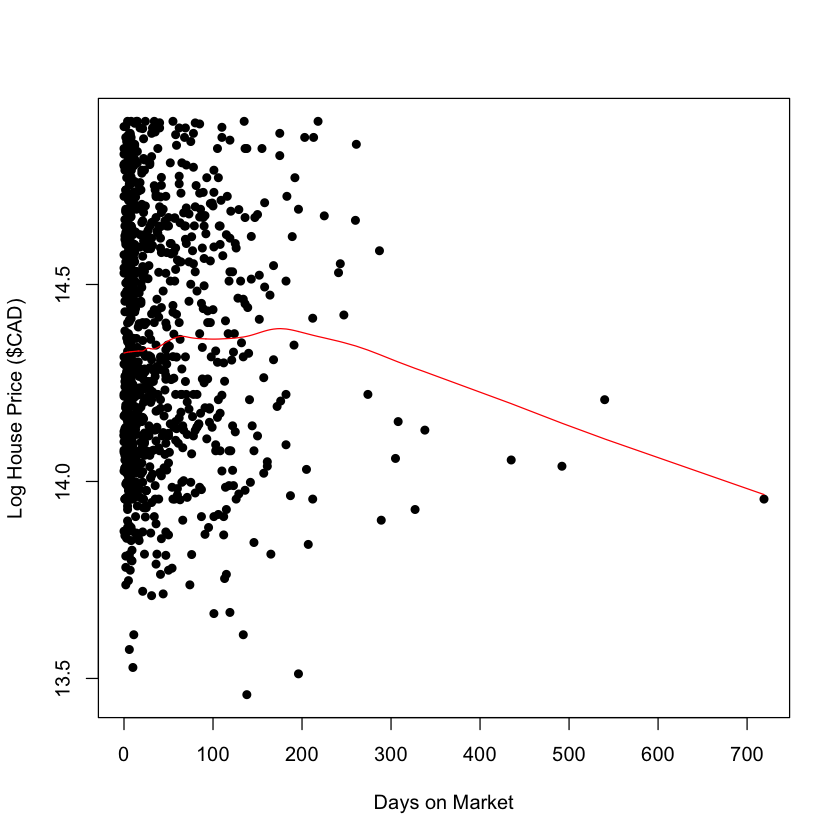

In [23]:
# Include the code for visualizing appropriate transformations of the variables here
plot(mydata.train$Days.on.market, mydata.train$Price.log, ylab = "Log House Price ($CAD)", xlab = "Days on Market", pch = 16)
x1 <- mydata.train$Days.on.market[order(mydata.train$Days.on.market)] #put the x-values in order
y1 <- mydata.train$Price.log[order(mydata.train$Days.on.market)] # put the y-values in order based on the order of the x-values
lines(lowess(x1, y1, delta=0.1), col="red")

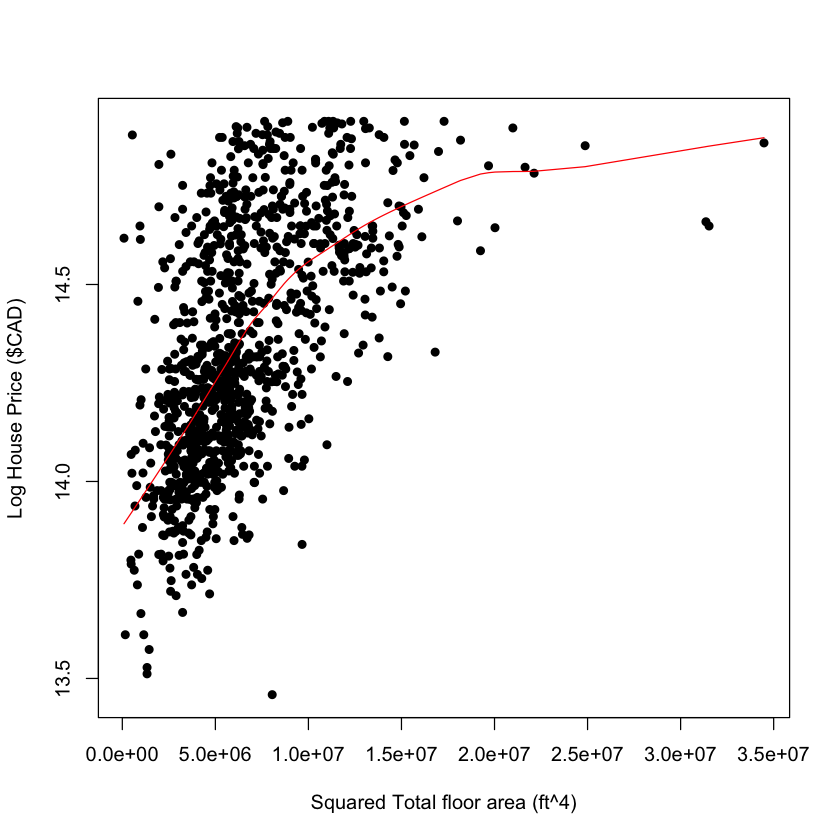

In [24]:
plot(mydata.train$Total.floor.area.sq, mydata.train$Price.log, ylab = "Log House Price ($CAD)", xlab = "Squared Total floor area (ft^4)", pch = 16)
x1 <- mydata.train$Total.floor.area.sq[order(mydata.train$Total.floor.area.sq)] #put the x-values in order
y1 <- mydata.train$Price.log[order(mydata.train$Total.floor.area.sq)] # put the y-values in order based on the order of the x-values
lines(lowess(x1, y1, delta=0.1), col="red")

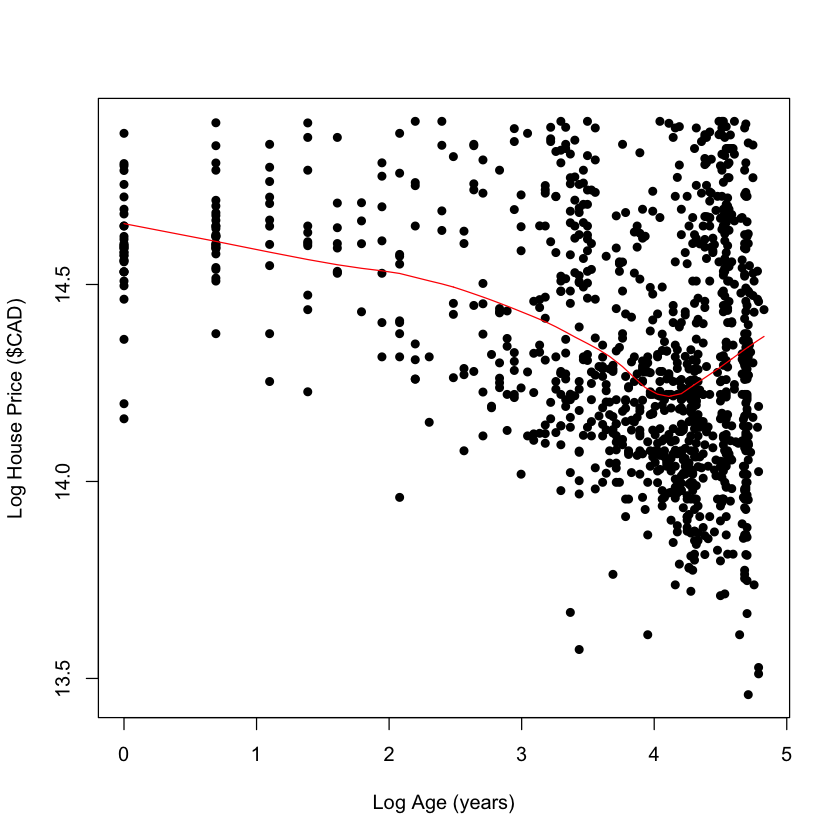

In [25]:
plot(mydata.train$Age.log, mydata.train$Price.log, ylab = "Log House Price ($CAD)", xlab = "Log Age (years)", pch = 16)
x1 <- mydata.train$Age.log[order(mydata.train$Age.log)] #put the x-values in order
y1 <- mydata.train$Price.log[order(mydata.train$Age.log)] # put the y-values in order based on the order of the x-values
lines(lowess(x1, y1, delta=0.1), col="red")

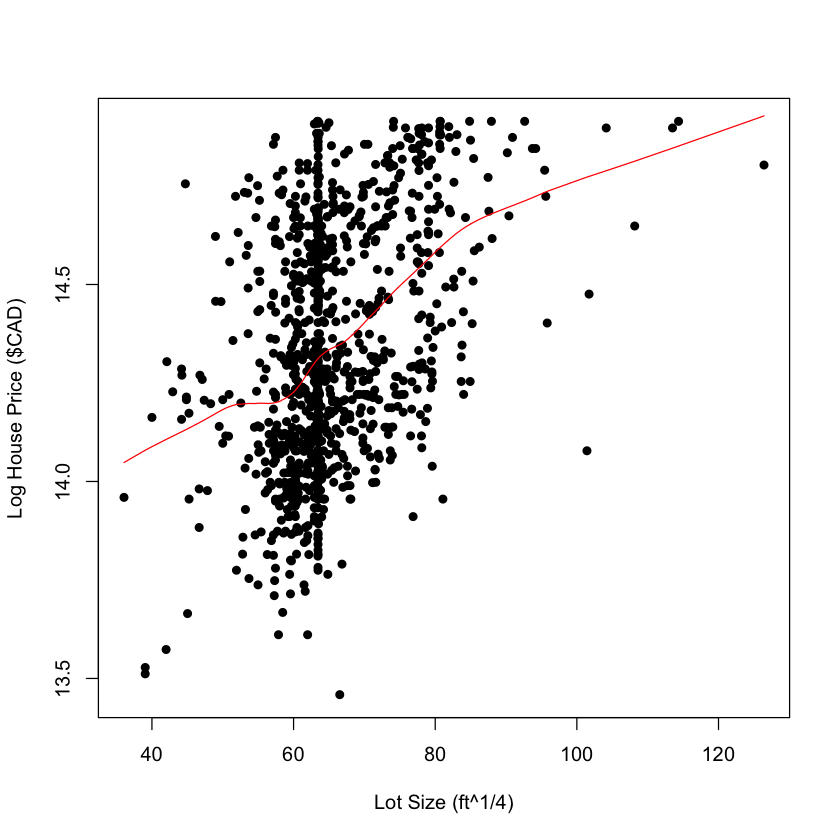

In [26]:
plot(mydata.train$Lot.Size.sqrt, mydata.train$Price.log, ylab = "Log House Price ($CAD)", xlab = "Lot Size (ft^1/4)", pch = 16)
x1 <- mydata.train$Lot.Size.sqrt[order(mydata.train$Lot.Size.sqrt)] #put the x-values in order
y1 <- mydata.train$Price.log[order(mydata.train$Lot.Size.sqrt)] # put the y-values in order based on the order of the x-values
lines(lowess(x1, y1, delta=0.1), col="red")

<code style="color:black">Although transformation of variables provides us with a better view of how the explanatory variables affect the response variable, we chose to not move ahead with the transformation model due to the complexity involved. The model was not fitting better than interaction model at a scale to validate the effort involved in it's complexity.
</code> 




---
<a id="Other_models"></a>
# Other candidate models (3 marks)

In [27]:
# The basic model with no transformation
# Simple linear regression model
modelA <- lm(Price ~ Days.on.market + Total.floor.area + Age + Lot.Size, data = mydata.train)
summary(modelA)


Call:
lm(formula = Price ~ Days.on.market + Total.floor.area + Age + 
    Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1262018  -308671   -93751   271334  1594018 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      582649.39   66166.22   8.806  < 2e-16 ***
Days.on.market     -411.48     215.97  -1.905  0.05702 .  
Total.floor.area    365.62      21.94  16.663  < 2e-16 ***
Age               -1333.63     405.78  -3.287  0.00105 ** 
Lot.Size             88.53      11.29   7.842  1.1e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 423700 on 1037 degrees of freedom
Multiple R-squared:  0.3831,	Adjusted R-squared:  0.3807 
F-statistic:   161 on 4 and 1037 DF,  p-value: < 2.2e-16


In [28]:
# predicting values based on linear model
prediction_modelA.valid <- predict(modelA, newdata = mydata.valid)
mydata.valid$prediction_modelA.valid <- prediction_modelA.valid
head(mydata.valid)

,Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size,prediction_final.valid,errors_final,prediction_modelA.valid
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1043,1043,3432 E 23RD AVENUE,6/11/2019,1314000,43,2650,1966,53,3960,1824461,-510461.44,1813746
1044,1044,3379 W 23RD AVENUE,9/11/2019,2175000,14,1636,1928,91,4026,1425977,749023.48,1410110
1045,1045,5597 INVERNESS STREET,3/4/2019,1950000,145,2964,2012,7,4125,2027180,-77179.97,1962534
1046,1046,3427 MONS DRIVE,11/6/2019,1210000,1,1446,1948,71,4510,1409001,-199000.64,1415515
1047,1047,3492 E 49TH AVENUE,3/12/2020,1360000,47,2782,1972,48,4845,1930734,-570734.44,1945382
1048,1048,6282 WINDSOR STREET,12/10/2019,1380000,8,1876,1953,66,4026,1511380,-131380.08,1533668


In [29]:
# RMSE and MAE of linear model
mydata.valid$errors_modelA <- mydata.valid$Price - mydata.valid$prediction_modelA.valid
RMSE_modelA <- sqrt(sum(mydata.valid$errors_modelA^2)/nrow(mydata.valid))
MAE_modelA <- sum(abs(mydata.valid$errors_modelA))/nrow(mydata.valid)

sprintf("The RMSE of modelA is %f", RMSE_modelA)
sprintf("The MAE of modelA is %f", MAE_modelA)

[1] "The RMSE of modelA is 453914.958938"

[1] "The MAE of modelA is 370727.233115"

In [30]:
# transforming variables for better model fit
modelB <- lm(Price.log ~ Total.floor.area + Total.floor.area.sq + Age.log + Lot.Size.sqrt, data = mydata.train)
summary(modelB)


Call:
lm(formula = Price.log ~ Total.floor.area + Total.floor.area.sq + 
    Age.log + Lot.Size.sqrt, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92683 -0.17019 -0.04207  0.17559  0.83954 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.339e+01  8.203e-02 163.212  < 2e-16 ***
Total.floor.area     3.059e-04  4.645e-05   6.584 7.24e-11 ***
Total.floor.area.sq -2.335e-08  8.577e-09  -2.722  0.00659 ** 
Age.log             -4.598e-02  7.136e-03  -6.443 1.79e-10 ***
Lot.Size.sqrt        8.030e-03  9.271e-04   8.662  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2321 on 1037 degrees of freedom
Multiple R-squared:  0.4096,	Adjusted R-squared:  0.4073 
F-statistic: 179.9 on 4 and 1037 DF,  p-value: < 2.2e-16


In [31]:
# transforming variables in the validation dataset for prediction
mydata.valid$Age.log <- log(mydata.valid$Age + 1)
mydata.valid$Lot.Size.sqrt <- sqrt(mydata.valid$Lot.Size)
mydata.valid$Total.floor.area.sq <- mydata.valid$Total.floor.area^2

# predicting values based on transformed variables model
prediction_modelB.valid <- predict(modelB, newdata = mydata.valid)
# converting predicted values to origional units
mydata.valid$prediction_modelB.valid.orig <- exp(prediction_modelB.valid)
head(mydata.valid)

,Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size,prediction_final.valid,errors_final,prediction_modelA.valid,errors_modelA,Age.log,Lot.Size.sqrt,Total.floor.area.sq,prediction_modelB.valid.orig
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1043,1043,3432 E 23RD AVENUE,6/11/2019,1314000,43,2650,1966,53,3960,1824461,-510461.44,1813746,-499746.3,3.988984,62.92853,7022500,1717772
1044,1044,3379 W 23RD AVENUE,9/11/2019,2175000,14,1636,1928,91,4026,1425977,749023.48,1410110,764889.8,4.521789,63.45077,2676496,1366231
1045,1045,5597 INVERNESS STREET,3/4/2019,1950000,145,2964,2012,7,4125,2027180,-77179.97,1962534,-12533.6,2.079442,64.22616,8785296,2001964
1046,1046,3427 MONS DRIVE,11/6/2019,1210000,1,1446,1948,71,4510,1409001,-199000.64,1415515,-205515.2,4.276666,67.15653,2090916,1361577
1047,1047,3492 E 49TH AVENUE,3/12/2020,1360000,47,2782,1972,48,4845,1930734,-570734.44,1945382,-585381.7,3.891820,69.60603,7739524,1864046
1048,1048,6282 WINDSOR STREET,12/10/2019,1380000,8,1876,1953,66,4026,1511380,-131380.08,1533668,-153667.6,4.204693,63.45077,3519376,1462813


In [32]:
# RMSE and MAE of transformed model
mydata.valid$errors_modelB <- mydata.valid$Price - mydata.valid$prediction_modelB.valid.orig
RMSE_modelB <- sqrt(sum(mydata.valid$errors_modelB^2)/nrow(mydata.valid))
MAE_modelB <- sum(abs(mydata.valid$errors_modelB))/nrow(mydata.valid)

sprintf("The RMSE of modelB is %f", RMSE_modelB)
sprintf("The MAE of modelB is %f", MAE_modelB)

[1] "The RMSE of modelB is 442524.270817"

[1] "The MAE of modelB is 349591.687255"